In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

In [45]:
file_path = "/content/drive/MyDrive/crt/CMGGRU.csv"
df = pd.read_csv(file_path)
df


,Date,Price
0,15/12/2023,39000.0
1,14/12/2023,38900.0
2,13/12/2023,38900.0
3,12/12/2023,39000.0
4,11/12/2023,38850.0
...,...,...
1739,23/12/2016,9321.7
1740,21/12/2016,9415.2
1741,19/12/2016,9352.8
1742,16/12/2016,9352.8


Ratio 7-3

In [46]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test theo tỉ lệ 8:2
df = df[['Price']]
df=df.dropna()
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7* len(df))
test_size = int(0.3 * len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]


In [47]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [48]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [49]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[8317.64175454 8292.93961071 8268.23746688 8243.53532304 8218.83317921
 8194.13103537 8169.42889154 8144.72674771 8120.02460387 8095.32246004
 8070.6203162  8045.91817237 8021.21602853 7996.5138847  7971.81174087
 7947.10959703 7922.4074532  7897.70530936 7873.00316553 7848.30102169
 7823.59887786 7798.89673403 7774.19459019 7749.49244636 7724.79030252
 7700.08815869 7675.38601486 7650.68387102 7625.98172719 7601.27958335]


In [50]:
# 7. Đánh giá độ chính xác test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print("MAPE:", mape)
test_mae = np.mean(np.abs(y_pred - y_test))
print("Testing MAE:",test_mae)


Testing RMSE: 3440.634629168718
MAPE: 17.13258610197334
Testing MAE: 2596.3440042264842


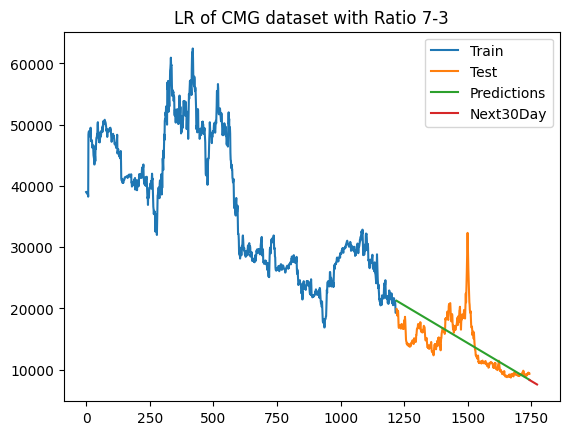

In [51]:

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.title('LR of CMG dataset with Ratio 7-3')
plt.show()

Ratio 8-2

In [52]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test theo tỉ lệ 8:2
df = df[['Price']]
df=df.dropna()
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8* len(df))
test_size = int(0.2* len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [53]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [54]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [55]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[6019.37056067 5992.91924959 5966.46793851 5940.01662743 5913.56531635
 5887.11400527 5860.66269419 5834.21138311 5807.76007203 5781.30876095
 5754.85744987 5728.40613879 5701.95482771 5675.50351663 5649.05220555
 5622.60089447 5596.14958339 5569.69827231 5543.24696123 5516.79565015
 5490.34433907 5463.89302799 5437.44171691 5410.99040583 5384.53909475
 5358.08778367 5331.63647259 5305.18516151 5278.73385043 5252.28253935]


In [56]:
# 7. Đánh giá độ chính xác test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print("MAPE:", mape)
test_mae = np.mean(np.abs(y_pred - y_test))
print("Testing MAE:",test_mae)

Testing RMSE: 4062.25984279699
MAPE: 17.74050429869495
Testing MAE: 2750.588320376745


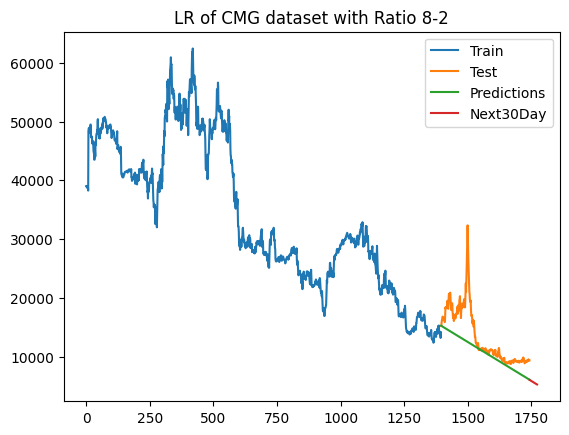

In [57]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.title('LR of CMG dataset with Ratio 8-2')
plt.show()

Ratio 9-1

In [58]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test theo tỉ lệ 8:2
df = df[['Price']]
df=df.dropna()
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.9* len(df))
test_size = int(0.1* len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [59]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [60]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [61]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[7945.87258529 7920.95465566 7896.03672604 7871.11879642 7846.2008668
 7821.28293718 7796.36500755 7771.44707793 7746.52914831 7721.61121869
 7696.69328907 7671.77535944 7646.85742982 7621.9395002  7597.02157058
 7572.10364096 7547.18571133 7522.26778171 7497.34985209 7472.43192247
 7447.51399285 7422.59606323 7397.6781336  7372.76020398 7347.84227436
 7322.92434474 7298.00641512 7273.08848549 7248.17055587 7223.25262625]


In [62]:
# 7. Đánh giá độ chính xác test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print("MAPE:", mape)
test_mae = np.mean(np.abs(y_pred - y_test))
print("Testing MAE:",test_mae)

Testing RMSE: 899.5728230100749
MAPE: 8.151707276483757
Testing MAE: 792.8512848460974


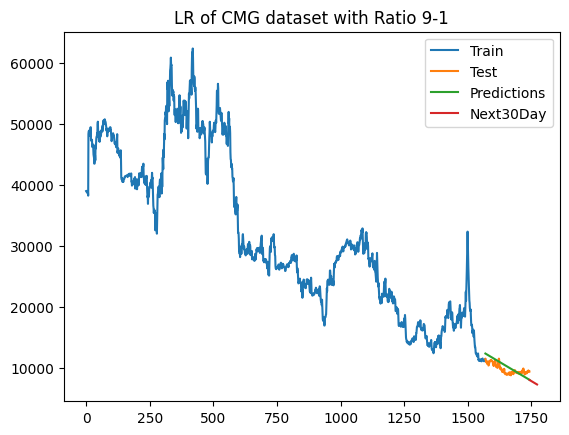

In [63]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.title('LR of CMG dataset with Ratio 9-1')
plt.show()